In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import random
from pprint import pprint

In [10]:
changes = pd.read_csv('changes-visitors-covid.csv')

In [11]:
changes.head()

,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
0,Afghanistan,AFG,2020-02-17,0.00,4.000,1.333,5.667,1.000,-6.333
1,Afghanistan,AFG,2020-02-18,0.75,4.250,0.750,6.500,1.500,-3.250
2,Afghanistan,AFG,2020-02-19,0.40,4.000,0.800,5.200,1.400,-1.600
3,Afghanistan,AFG,2020-02-20,0.00,3.833,0.833,5.000,1.000,-0.333
4,Afghanistan,AFG,2020-02-21,0.00,4.571,0.714,5.286,1.429,0.571


In [12]:
changes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61950 entries, 0 to 61949
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 61950 non-null  object 
 1   Code                   61950 non-null  object 
 2   Day                    61950 non-null  object 
 3   retail_and_recreation  60850 non-null  float64
 4   grocery_and_pharmacy   60875 non-null  float64
 5   residential            60586 non-null  float64
 6   transit_stations       61072 non-null  float64
 7   parks                  60891 non-null  float64
 8   workplaces             61909 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.3+ MB


In [13]:
covid = pd.read_csv('owid-covid-data (1).csv')

In [14]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [15]:
changes = changes[changes['Entity']=='India']

In [16]:
changes.head()

,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
23897,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000
23898,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000
23899,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200
23900,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333
23901,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143


In [17]:
covid = covid[covid['location'] == 'India']

In [18]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
38584,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38585,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38586,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38587,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38588,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [19]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [20]:
covid.drop(axis = 1, columns = ['total_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],inplace = True)

In [21]:
covid.head()

,iso_code,continent,location,date,new_cases
38584,IND,Asia,India,2020-01-30,1.0
38585,IND,Asia,India,2020-01-31,0.0
38586,IND,Asia,India,2020-02-01,0.0
38587,IND,Asia,India,2020-02-02,1.0
38588,IND,Asia,India,2020-02-03,1.0


In [22]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 38584 to 39074
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   iso_code   491 non-null    object 
 1   continent  491 non-null    object 
 2   location   491 non-null    object 
 3   date       491 non-null    object 
 4   new_cases  491 non-null    float64
dtypes: float64(1), object(4)
memory usage: 23.0+ KB


In [23]:
changes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 23897 to 24367
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 471 non-null    object 
 1   Code                   471 non-null    object 
 2   Day                    471 non-null    object 
 3   retail_and_recreation  471 non-null    float64
 4   grocery_and_pharmacy   471 non-null    float64
 5   residential            471 non-null    float64
 6   transit_stations       471 non-null    float64
 7   parks                  471 non-null    float64
 8   workplaces             471 non-null    float64
dtypes: float64(6), object(3)
memory usage: 36.8+ KB


In [24]:
changes.rename(columns={"Day":"date"},inplace=True)

In [25]:
changes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 23897 to 24367
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 471 non-null    object 
 1   Code                   471 non-null    object 
 2   date                   471 non-null    object 
 3   retail_and_recreation  471 non-null    float64
 4   grocery_and_pharmacy   471 non-null    float64
 5   residential            471 non-null    float64
 6   transit_stations       471 non-null    float64
 7   parks                  471 non-null    float64
 8   workplaces             471 non-null    float64
dtypes: float64(6), object(3)
memory usage: 36.8+ KB


In [26]:
df = pd.merge(changes, covid, on = 'date')

In [27]:
df.head()

,Entity,Code,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,iso_code,continent,location,new_cases
0,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000,IND,Asia,India,0.0
1,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000,IND,Asia,India,0.0
2,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200,IND,Asia,India,0.0
3,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333,IND,Asia,India,0.0
4,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143,IND,Asia,India,0.0


In [28]:
df.drop(inplace = True, axis = 1, columns = ['iso_code', 'location', 'continent','Entity', 'Code','date'])

In [29]:
df.head()

,Entity,Code,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000,0.0
1,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000,0.0
2,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200,0.0
3,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333,0.0
4,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 470
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   retail_and_recreation  471 non-null    float64
 1   grocery_and_pharmacy   471 non-null    float64
 2   residential            471 non-null    float64
 3   transit_stations       471 non-null    float64
 4   parks                  471 non-null    float64
 5   workplaces             471 non-null    float64
 6   new_cases              471 non-null    float64
dtypes: float64(7)
memory usage: 29.4 KB


In [34]:
df['new_cases']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
466    173790.0
467    165553.0
468    152734.0
469    127510.0
470    132788.0
Name: new_cases, Length: 471, dtype: float64

In [67]:
def train_test_split(df, train_size, valid_size):
    df = df.sample(frac = 1, random_state = 42)
    if type(train_size) == float:
        train_index = int(len(df)*train_size)
    train = df[0:train_index]
    df_rem = df[train_index:]
    if type(valid_size) == float:
        valid_index = int(len(df)*valid_size)
    valid = df[train_index:train_index + valid_index]
    test = df[train_index + valid_index:]
    return train, valid, test

In [68]:
train, valid, test = train_test_split(df, 0.8, 0.1)

In [69]:
train.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
55,-78.286,-55.143,28.714,-68.714,-49.429,-63.857,759.0
73,-85.143,-45.857,28.286,-65.571,-63.000,-58.571,1801.0
33,-16.286,0.000,4.714,-12.714,-8.286,-8.857,86.0
446,-60.857,-22.000,24.000,-46.571,-44.000,-46.714,403405.0
425,-34.429,10.857,15.143,-20.714,-23.714,-26.714,261394.0


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 55 to 337
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   retail_and_recreation  376 non-null    float64
 1   grocery_and_pharmacy   376 non-null    float64
 2   residential            376 non-null    float64
 3   transit_stations       376 non-null    float64
 4   parks                  376 non-null    float64
 5   workplaces             376 non-null    float64
 6   new_cases              376 non-null    float64
dtypes: float64(7)
memory usage: 23.5 KB


In [71]:
test.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
452,-63.857,-25.429,25.429,-50.286,-44.857,-50.000,326098.0
319,-25.857,9.714,11.571,-7.857,-12.857,-16.857,20035.0
243,-34.429,7.143,13.000,-21.857,-42.429,-20.857,61871.0
54,-78.000,-56.429,28.571,-69.286,-49.714,-63.714,848.0
363,-21.857,16.857,6.714,-6.857,-13.571,-15.429,11649.0


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 452 to 102
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   retail_and_recreation  48 non-null     float64
 1   grocery_and_pharmacy   48 non-null     float64
 2   residential            48 non-null     float64
 3   transit_stations       48 non-null     float64
 4   parks                  48 non-null     float64
 5   workplaces             48 non-null     float64
 6   new_cases              48 non-null     float64
dtypes: float64(7)
memory usage: 3.0 KB


In [73]:
valid.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
236,-37.143,3.429,11.286,-23.571,-44.286,-24.000,74383.0
207,-44.429,-5.143,11.857,-31.429,-47.000,-24.571,97570.0
212,-41.286,-5.286,12.429,-30.714,-46.000,-24.143,97894.0
295,-28.857,7.429,9.286,-17.429,-19.857,-19.857,32080.0
430,-43.000,0.286,18.143,-28.857,-32.000,-31.286,332921.0


In [74]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 236 to 306
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   retail_and_recreation  47 non-null     float64
 1   grocery_and_pharmacy   47 non-null     float64
 2   residential            47 non-null     float64
 3   transit_stations       47 non-null     float64
 4   parks                  47 non-null     float64
 5   workplaces             47 non-null     float64
 6   new_cases              47 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [75]:
def give_mean(data):
    tar_col = data[:,-1]
    mean = np.mean(tar_col)
    return mean

In [76]:
def get_potential_splits(data):
    _, num_cols = data.shape
    data = data[:,:num_cols-1]
    _, num_cols = data.shape
    potential_splits = {}
    for i in range(num_cols):
        potential_splits[i] = []
        values = data[:,i]
        values = np.unique(values)

        for j in range(1,len(values)):
            potential_split = (values[j] + values[j-1])/2 
            potential_splits[i].append(potential_split)
    return potential_splits

In [77]:
def split_data(data, split_feature, split_value):
    cond = data[:,split_feature] <= split_value
    data_below = data[cond]
    data_above = data[~cond]
    return data_below, data_above

In [78]:
def cal_rss(data):
    tar_col = data[:,-1]
    rss = np.sum((tar_col - np.mean(tar_col))**2)
    return rss

In [79]:
def calculate_total_rss(data_below, data_above):
    total_rss = cal_rss(data_below) + cal_rss(data_above)
    return total_rss

In [80]:
def get_best_split(data, potential_splits):
    total_rss = sys.maxsize
    best_split_feature = None
    best_split_value = None
    for i in potential_splits:
        for j in potential_splits[i]:
            data_below, data_above = split_data(data, i, j)
            current_total_rss = calculate_total_rss(data_below, data_above)
            if current_total_rss <= total_rss:
                total_rss = current_total_rss
                best_split_feature = i
                best_split_value = j
                
    return best_split_feature, best_split_value  

In [81]:
features = df.columns

In [82]:
def decision_tree_algo(df, max_depth, counter = 0, min_size = 15):
    data = df.values
    if (len(data) < min_size) or (counter == max_depth):
        return give_mean(data)
    else:
        counter += 1
        potential_splits = get_potential_splits(data)
        split_feature, split_value = get_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_feature, split_value)
        
        feature_name = features[split_feature]
        que = "{} <= {}".format(feature_name, split_value)
        sub_tree = {que : []}
        yes_ans = decision_tree_algo(pd.DataFrame(data_below),max_depth, counter, min_size)
        no_ans = decision_tree_algo(pd.DataFrame(data_above), max_depth, counter, min_size)
        if yes_ans == no_ans:
            sub_tree = yes_ans
        else:
            sub_tree[que].append(yes_ans)
            sub_tree[que].append(no_ans)
        return sub_tree

In [83]:
example = test.iloc[0]

In [84]:
def predict_example(example, tree):
    que = list(tree.keys())[0]
    feature_name, comparison_operator, value = que.split()
    
    if example[feature_name] <= float(value):
        ans = tree[que][0]
    else: 
        ans = tree[que][1]
        
    if type(ans) != dict:
        return ans
    else:
        residual_tree = ans
        return predict_example(example, residual_tree)

In [85]:
predict_example(example, tree)

3606.5833333333335

In [1]:
def calculate_r_squared(df, tree):
    values = df.new_cases
    mean = values.mean()
    predictions = df.apply(predict_example, args = (tree,), axis = 1)
    x = sum((values - predictions)**2)
    y = sum((values - mean)**2)
    r_squared = 1 - x / y
    return r_squared

In [87]:
grid_search = {"max_depth": [], "min_samples": [], "r_squared_train": [], "r_squared_val": []}
for max_depth in range(2,11):
    for min_samples in range(5,40,5):
        tree = decision_tree_algo(train, max_depth = max_depth, min_size = min_samples)
        r_squared_train = calculate_r_squared(train, tree)
        r_squared_val = calculate_r_squared(valid, tree)
        grid_search["max_depth"].append(max_depth)
        grid_search["min_samples"].append(min_samples)
        grid_search["r_squared_train"].append(r_squared_train)
        grid_search["r_squared_val"].append(r_squared_val)
grid_search = pd.DataFrame(grid_search)
grid_search.sort_values("r_squared_val", ascending = False).head()

,max_depth,min_samples,r_squared_train,r_squared_val
56,10,5,0.996206,0.980527
49,9,5,0.993785,0.976057
42,8,5,0.990958,0.975601
58,10,15,0.971687,0.971379
51,9,15,0.971519,0.971341


In [88]:
best_max_depth = 10
best_min_size = 5

tree = decision_tree_algo(train, max_depth = best_max_depth, min_size = best_min_size)
calculate_r_squared(test, tree)

0.825441101893133

In [89]:
def create_plot(df, tree, title):
    predictions = df.apply(predict_example, args = (tree,), axis = 1)
    actual = df.new_cases
    plot_df = pd.DataFrame({"actual":actual, "predictions":predictions})
    plot_df.plot(figsize = (18, 5), title = title)
    
    return

In [91]:
df.apply(predict_example, args = (tree,), axis = 1)

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
466    180077.0
467    140122.0
468    140122.0
469    140122.0
470    390086.0
Length: 471, dtype: float64

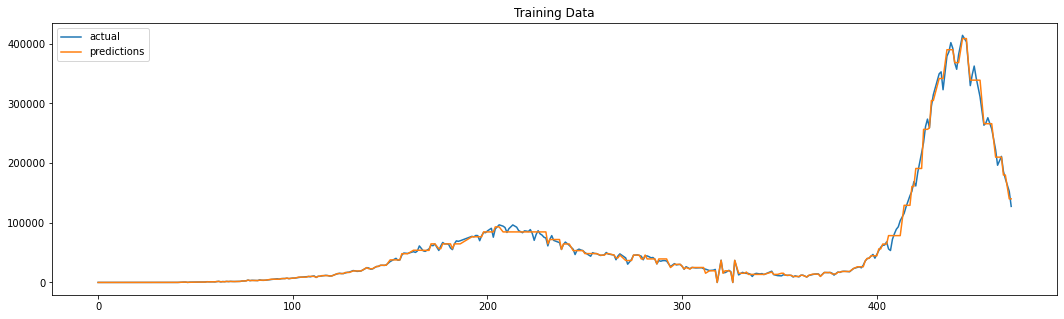

In [93]:
create_plot(train.sort_index(), tree, title = "Training Data")

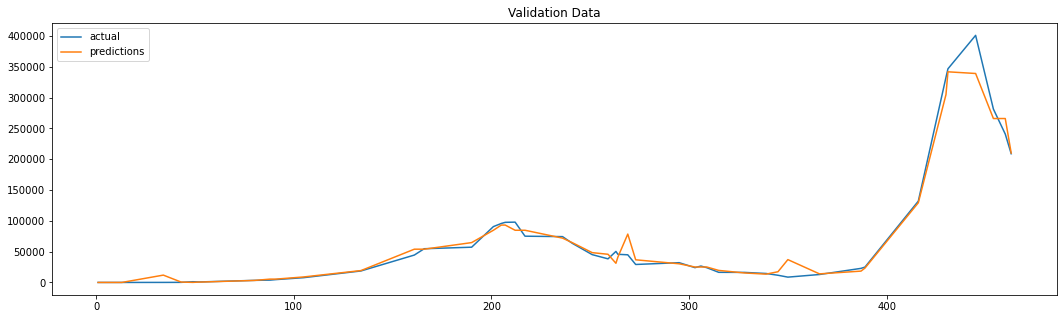

In [94]:
create_plot(valid.sort_index(), tree, title = "Validation Data")

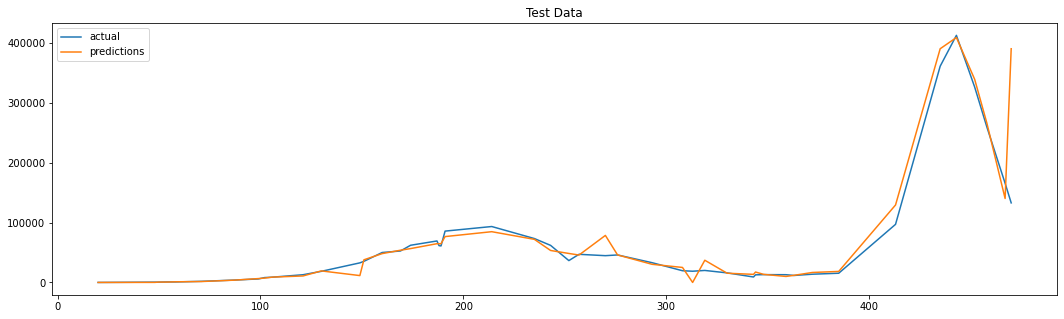

In [95]:
create_plot(test.sort_index(), tree, title = "Test Data")